In [704]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [657]:
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [658]:
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
complete_df = pd.merge(study_results,mouse_metadata, how='outer',  on=['Mouse ID', 'Mouse ID'])
complete_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [659]:
unique_mice = complete_df['Mouse ID'].unique()
mice_total = len(unique_mice)
mice_total

249

In [660]:
find_duplicate = complete_df.loc[complete_df.duplicated(['Mouse ID', 'Timepoint'], keep=False), 'Mouse ID'].unique()
find_duplicate

array(['g989'], dtype=object)

In [661]:
duplicated_df = complete_df.loc[complete_df['Mouse ID'] == 'g989']
duplicated_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [662]:
cleaned_df = complete_df.drop_duplicates(subset=['Mouse ID','Timepoint'])
cleaned_df.head()
                    

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [663]:
cleaned_unique = cleaned_df['Mouse ID'].unique()
cleaned_length = len(cleaned_count)
cleaned_length

248

## Summary Statistics

In [664]:
cleaned_df.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,19.597458,50.449276,1.023835,12.792903,25.661547
std,14.084762,8.904565,1.138507,7.186737,3.926776
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.951421,1.000000,13.000000,27.000000
75%,30.000000,56.324075,2.000000,20.000000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


In [665]:
stats_mean = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).mean(numeric_only=False)
stats_median = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).median()
stats_variance = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).var()
stats_std = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).std()
stats_sem = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).sem()

stats_summary = pd.DataFrame({
    "Mean Tumor Volume": stats_mean,
    "Median Tumor Volume": stats_median,
    "Tumor Volume Variance": stats_variance,
    "Tumor Volume Std. Dev.": stats_std,
    "Tumor Volume Std. Err.": stats_sem
})

stats_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [666]:
advanced_summary = cleaned_df.groupby(
    ['Drug Regimen'])[['Tumor Volume (mm3)']].agg(
    ['mean', 'median', 'var', 'std', 'sem'])

advanced_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

Text(0.5, 1.0, 'Mouse Treatment Days')

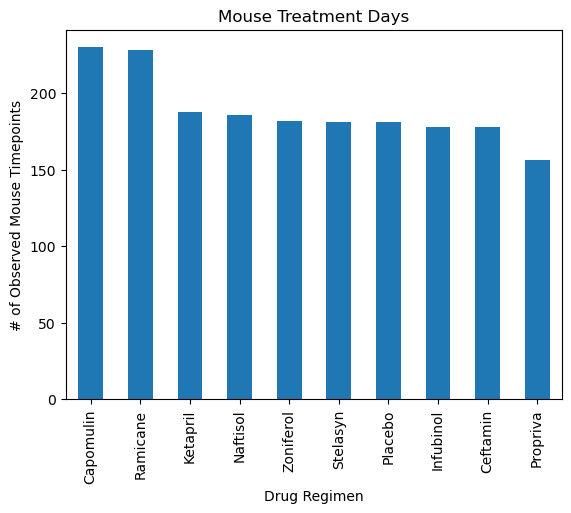

In [667]:
mouse_totals = cleaned_df['Drug Regimen'].value_counts()
pandas_graph = mouse_totals.plot(kind='bar')

pandas_graph.set_xlabel('Drug Regimen')
pandas_graph.set_ylabel('# of Observed Mouse Timepoints')
pandas_graph.set_title('Mouse Treatment Days')


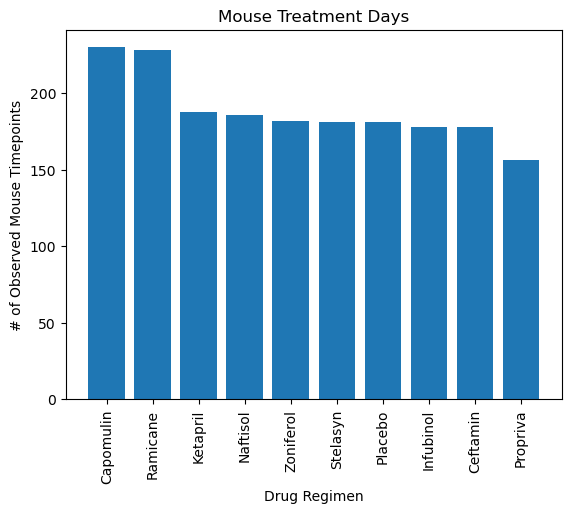

In [668]:
treatment_index = mouse_totals.index
treatment_list = treatment_index.to_list() 
timepoint_values = mouse_totals.values

plt.bar(treatment_list, timepoint_values, align='center')
plt.xticks(rotation='vertical')

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Mouse Treatment Days')
plt.show()


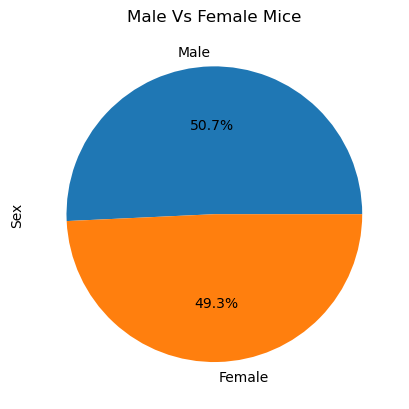

In [669]:
mice_gender = cleaned_df['Sex'].value_counts()
pandas_pie = mice_gender.plot.pie(autopct='%1.1f%%')
pandas_pie.set_title('Male Vs Female Mice')
pandas_pie.set_ylabel('Sex')
pandas_pie.set_aspect('equal')


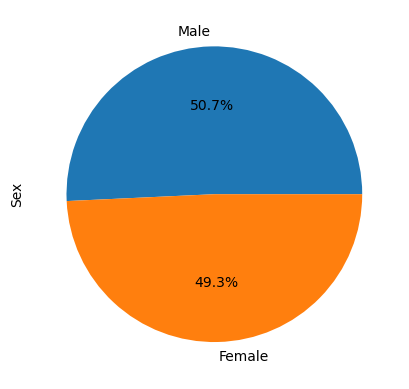

In [670]:
mice_label = ['Male', 'Female']
gender_percent = [50.741524, 49.258474]

plt.pie(gender_percent, labels=mice_label, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [671]:
tumor_volume_df = cleaned_df.groupby(['Mouse ID', 'Drug Regimen'])
greatest_timepoint = tumor_volume_df['Timepoint'].max()

regimen_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_tumor_df = cleaned_df[cleaned_df['Drug Regimen'].isin(regimen_list)]

tumor_merged_df = pd.merge(filtered_tumor_df, greatest_timepoint, on=['Mouse ID', 'Drug Regimen', 'Timepoint'], how='right')
tumor_volume_final_df = tumor_merged_df[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]
tumor_volume_final_df


,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a262,Placebo,NaN
3,a275,Ceftamin,62.999356
4,a366,Stelasyn,NaN
...,...,...,...
244,z435,Propriva,NaN
245,z578,Ramicane,30.638696
246,z581,Infubinol,62.754451
247,z795,Naftisol,NaN


In [672]:
tumor_vol_df = {}

for regimen in regimen_list:
    regimen_df = tumor_volume_final_df[tumor_volume_final_df['Drug Regimen'] == regimen]
    tumor_vol = regimen_df['Tumor Volume (mm3)']
    
    quartiles = tumor_vol.quantile([0.25, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    upper_b = upperq + (1.5 * iqr)
    lower_b = lowerq - (1.5 * iqr) 
    outliers = tumor_vol[(tumor_vol < lower_b) | (tumor_vol > upper_b)]
    tumor_vol_df[regimen] = tumor_vol
    outliers_df = outliers.tolist()
    
    print(f'Drug Regimen: {regimen}')
    print(f'Potential Outliers: {outliers}')

Drug Regimen: Capomulin
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Drug Regimen: Ramicane
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Drug Regimen: Infubinol
Potential Outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen: Ceftamin
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


[]

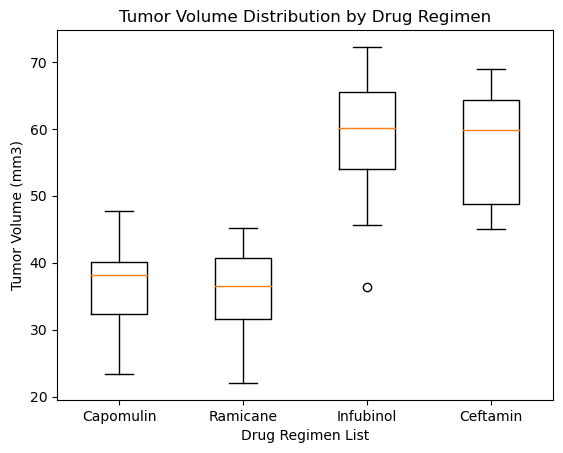

In [673]:
tumor_vol_plot = [tumor_vol_df[regimen] for regimen in regimen_list]
plt.boxplot(tumor_vol_plot, labels=regimen_list)
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Drug Regimen List')
plt.title('Tumor Volume Distribution by Drug Regimen')
plt.plot()

## Line and Scatter Plots 

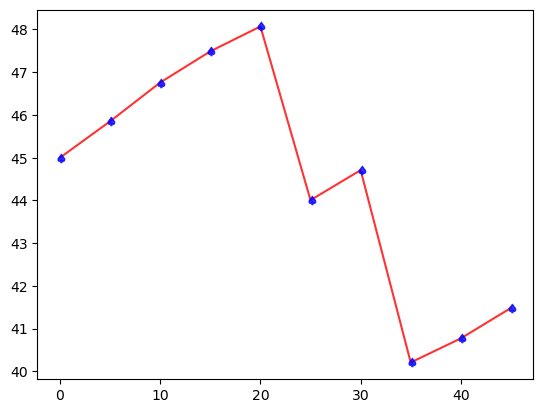

In [674]:
capomulin_df = cleaned_df.loc[cleaned_df['Drug Regimen'] == 'Capomulin']
selected_mouse_df = capomulin_df.loc[capomulin_df['Mouse ID'] == 'l509']
spade = mpl.markers.MarkerStyle(marker=r'$\spadesuit$')
plt.plot(
    selected_mouse_df['Timepoint'], 
    selected_mouse_df['Tumor Volume (mm3)'],
    color='r', linestyle='-', alpha=0.8, marker=spade,
    markerfacecolor='b', markeredgecolor='b')

plt.show()

In [675]:
capomulin_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


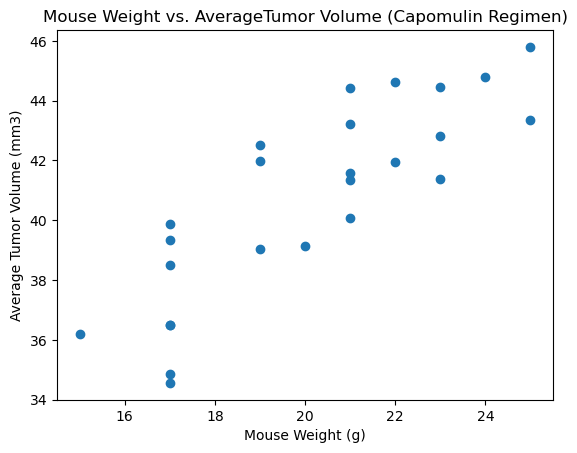

In [702]:
tumor_vol_avg = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_df.groupby('Mouse ID')['Weight (g)'].mean()

plt.scatter(mouse_weight, tumor_vol_avg)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. AverageTumor Volume (Capomulin Regimen)')
plt.show()

## Correlation and Regression

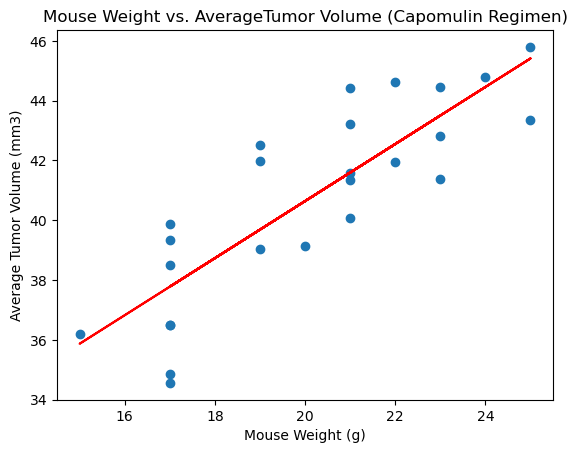

In [710]:
correlation_coefficient = np.corrcoef(mouse_weight, tumor_vol_avg)[0,1]
plt.scatter(mouse_weight, tumor_vol_avg)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. AverageTumor Volume (Capomulin Regimen)')

slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, tumor_vol_avg)
regression_line = slope * mouse_weight + intercept

plt.plot(mouse_weight, regression_line, color='r')

plt.show()